<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/SPYautocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Autocorrelation, Autoregressive(AR)**
# **From Datacamp's Time Series Analysis Course**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,8)

In [ ]:
df = yf.download(['SPY', '^TNX'])['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
df = df.dropna()
df

,SPY,^TNX
Date,,
1993-01-29,25.334024,6.390
1993-02-01,25.514212,6.380
1993-02-02,25.568260,6.460
1993-02-03,25.838537,6.450
1993-02-04,25.946653,6.390
...,...,...
2022-09-22,374.220001,3.708
2022-09-23,367.950012,3.697
2022-09-26,364.309998,3.878


In [ ]:
df['spy_return'] = np.log(df['SPY']/df['SPY'].shift(1))
df['tnx_return'] = np.log(df['^TNX']/df['^TNX'].shift(1))

# Correlation of SPY and 10Y's log returns


In [ ]:
df['spy_return'].corr(df['tnx_return'])

0.2731038687944271

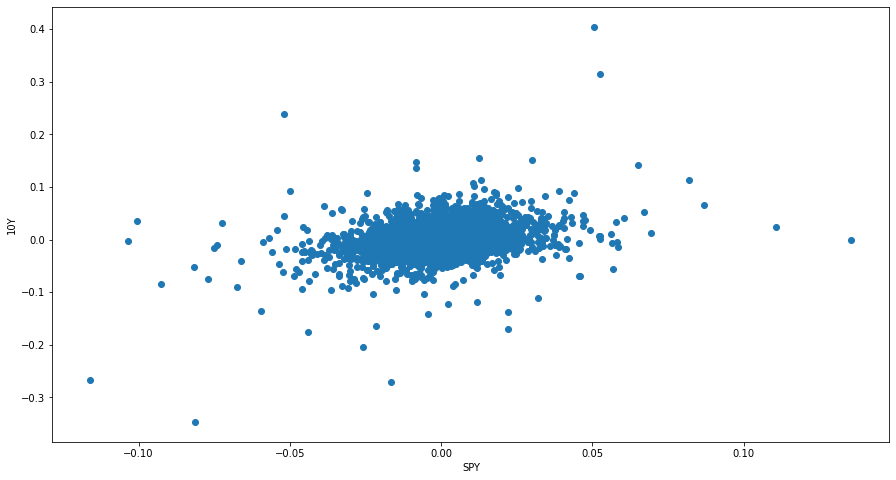

In [ ]:
plt.scatter(df['spy_return'], df['tnx_return'])
plt.xlabel('SPY')
plt.ylabel('10Y')
plt.show()

# Simple OLS of SPY & 10Y's log returns

In [ ]:
import statsmodels.api as sm

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = sm.add_constant(df)
results = sm.OLS(df['spy_return'], df[['const','tnx_return']]).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             spy_return   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     600.1
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          1.58e-127
Time:                        12:00:51   Log-Likelihood:                 22715.
No. Observations:                7448   AIC:                        -4.543e+04
Df Residuals:                    7446   BIC:                        -4.541e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.792      0.0

# Autocorrelation of BTC-USD Lag 1 & 30 using pandas autocorr()
* autocorrelation is the correlation of a lagged copy of itself
*A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.* - stat.psu
* With financial time-series the returns with negative autocorrelation is said to be mean reverting 
* Positive autocorrelation is said to be trend-following

In [ ]:
btc = yf.download('btc-usd')[['Adj Close','Volume']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc['logreturns'] = np.log(btc['Adj Close']/btc['Adj Close'].shift(1))
btc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,Volume,logreturns
Date,,,
2014-09-17,457.334015,21056800,NaN
2014-09-18,424.440002,34483200,-0.074643
2014-09-19,394.795990,37919700,-0.072402
2014-09-20,408.903992,36863600,0.035111
2014-09-21,398.821014,26580100,-0.024968
...,...,...,...
2022-09-25,18802.097656,23359966112,-0.007150
2022-09-26,19222.671875,44148798321,0.022122
2022-09-27,19110.546875,58571439619,-0.005850


In [ ]:
autocorrelation = btc['logreturns'].autocorr()
autocorrelation

-0.020094583150519506

Bitcoins lag-1 autocorrelation is negative, meaning it is slightly mean reverting daily (but theres more noise using daily)

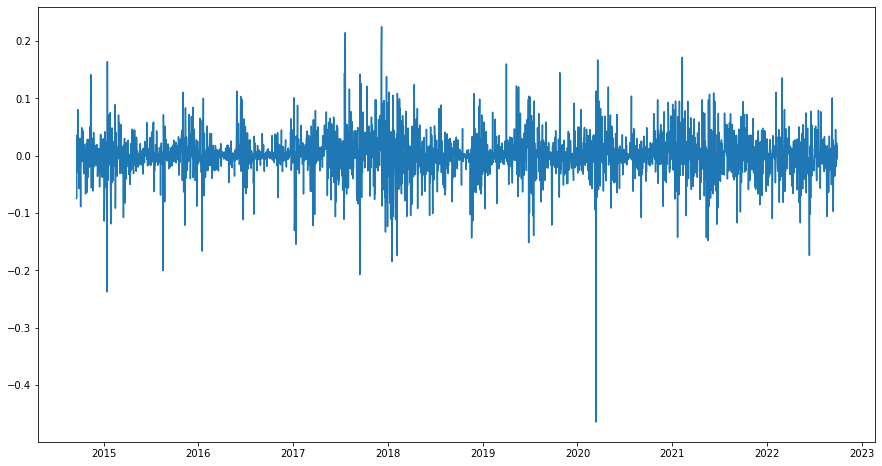

In [ ]:
plt.plot(btc['logreturns'])
plt.show()

In [ ]:
btc_monthly = btc.resample('M').last()

In [ ]:
btc_monthly['logreturns'] = np.log(btc_monthly['Adj Close']/btc_monthly['Adj Close'].shift(1))

In [ ]:
btc_monthly.dropna(inplace=True)
btc_monthly

,Adj Close,Volume,logreturns
Date,,,
2014-10-31,338.321014,12545400,-0.134285
2014-11-30,378.046997,9194440,0.111023
2014-12-31,320.192993,13942900,-0.166095
2015-01-31,217.464005,23348200,-0.386891
2015-02-28,254.263000,13949300,0.156336
...,...,...,...
2022-05-31,31792.310547,33538210634,-0.170830
2022-06-30,19784.726562,26267239923,-0.474314
2022-07-31,23336.896484,23553591896,0.165125


In [ ]:
btc_monthly['logreturns'].autocorr()

0.14902860371758703

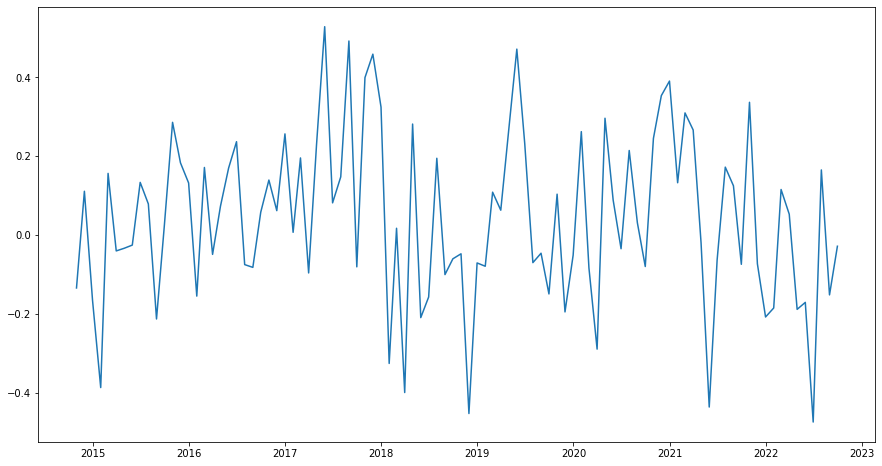

In [ ]:
plt.plot(btc_monthly['logreturns'])
plt.show()

# 10y-13W Spread Autocorrelated

In [ ]:
yields = yf.download(['^TNX','^IRX'])['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
yields['spread'] = yields['^TNX'] - yields['^IRX']
yields

,^IRX,^TNX,spread
Date,,,
1962-01-02,2.700,4.060,1.360
1962-01-03,2.730,4.030,1.300
1962-01-04,2.720,3.990,1.270
1962-01-05,2.740,4.020,1.280
1962-01-08,2.780,4.030,1.250
...,...,...,...
2022-09-22,3.130,3.708,0.578
2022-09-23,3.108,3.697,0.589
2022-09-26,3.165,3.878,0.713


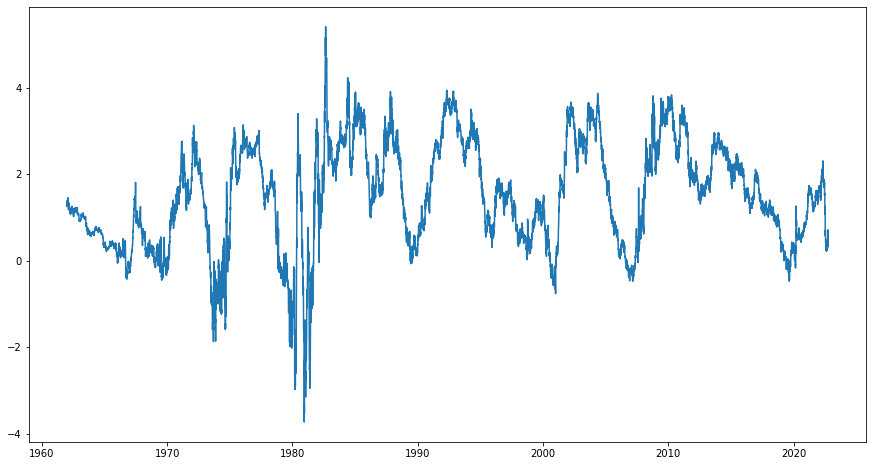

In [ ]:
plt.plot(yields.spread)
plt.show()

In [ ]:
daily_spread_change = yields.spread.diff()
autocorrelation_daily = daily_spread_change.autocorr()
print('Autocorrelation of daily 10y-13W spread', round(autocorrelation_daily,4))

Autocorrelation of daily 10y-13W spread 0.1003


In [ ]:
annual_spread = yields.resample('A').last()
annual_spread_change = annual_spread.spread.diff()
autocorrelation_daily = annual_spread_change.autocorr()
print('Autocorrelation of daily 10y-13W spread', round(autocorrelation_daily,4))

Autocorrelation of daily 10y-13W spread -0.0817


* Implies short term correlated short term
* but long term is mean reverting and yield spreads corrects itself

# Autocorrelation Function (SPY Returns & Volatility)
**using statsmodels.graphics.tsaplots import plot_acf**
* to visualise how a series is correlated by itself with each shift
* with weather, further away you shift, the lower the correlation
* but with Earnings, this may be different

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from math import sqrt

* alpha = show the width of C.I. 

In [ ]:
spy = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy_weekly = spy.resample('W').last()
spy_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-31,43.968750,43.968750,43.750000,43.937500,25.333998,1003200
1993-02-07,44.968750,45.062500,44.718750,44.968750,25.928633,492100
1993-02-14,44.875000,44.875000,44.593750,44.593750,25.712408,42500
1993-02-21,43.406250,43.562500,43.343750,43.562500,25.117807,34900
1993-02-28,44.437500,44.437500,44.187500,44.406250,25.604315,66200
...,...,...,...,...,...,...
2022-09-04,400.279999,401.559998,390.329987,392.239990,390.635315,99574100
2022-09-11,402.739990,407.510010,402.459991,406.600006,404.936584,76618100
2022-09-18,384.140015,386.250000,382.109985,385.559998,385.559998,102806100


In [ ]:
spy_weekly['logreturns'] = np.log(spy_weekly['Adj Close']/spy_weekly['Adj Close'].shift(1))
spy_weekly.dropna(inplace=True)
autocorrelation = spy_weekly['logreturns'].autocorr()
print('weekly SPY autocorrelaiton is',autocorrelation)

weekly SPY autocorrelaiton is -0.08469091977056306


# Is the SPY weekly autocorrelation statistically significant?
* can we say with 95% confidence that the autocorrelation is the calculated value?

The approximate confidence interval is +/- 0.05


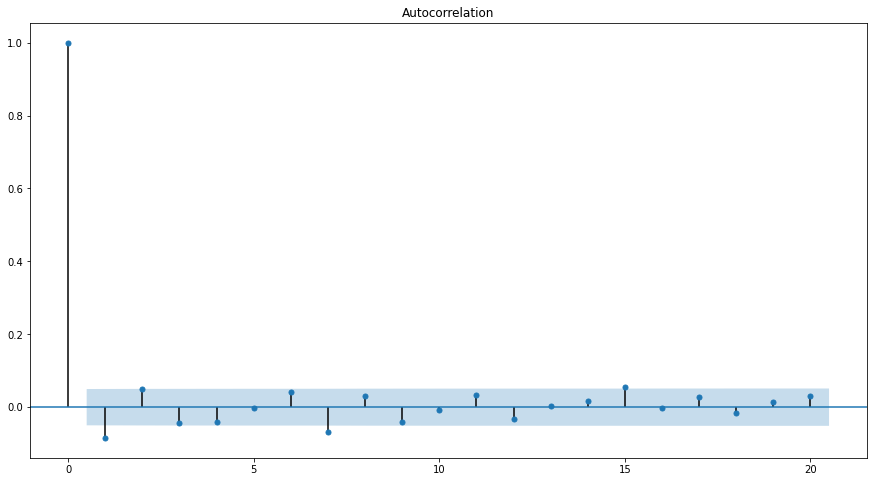

In [ ]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(spy_weekly)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(spy_weekly['logreturns'], alpha=0.05, lags=20)
plt.show()

# Findings: SPY returns are statistically less correlated to itself the further out it goes
* The weekly lag 1 autocorrelation was -0.085, significantly different,
but the other lags are less significantly different.



# Statistically Testing for Random Walk using **Dickey-Fuller** Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
btc.dropna(inplace=True)

## Are Bitcoin's prices a random walk?

In [ ]:
# Run the ADF test on the price series and print p-value
results = adfuller(btc['Adj Close'])
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 0.44650225024461493


According to this test, we do not reject the Null Hypothesis that Bitcoin Prices follows a random walk

## Are Bitcoin's returns a random walk?


In [ ]:
# Run the ADF test on the price series and print p-value
results = adfuller(btc['logreturns'])
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 0.0


Bitcoin's returns are a random walk at a significant level

# Is it Stationary?
* **Strong stationarity** means the joint distribution of observations do not depend on time
* **Weak stationarity** means the mean,variance,autocorrelation do not depend on time.
* If parameters vary with time, it becomes too hard to model
* Stationary is necessary for  **Parsimonious models** - simple models with small set of parameters with great explanatory predictive power.

* Examples of Nonstationary Series:
  * Random walk - variance grows with time. If Bitcoins returns are a random walk, then the uncertainty tomorrow is much less than 10 years from now.
  * Seasonality Series - google searches for 'All i want for christmas is you'
  * White noise with a drift


[*********************100%***********************]  1 of 1 completed


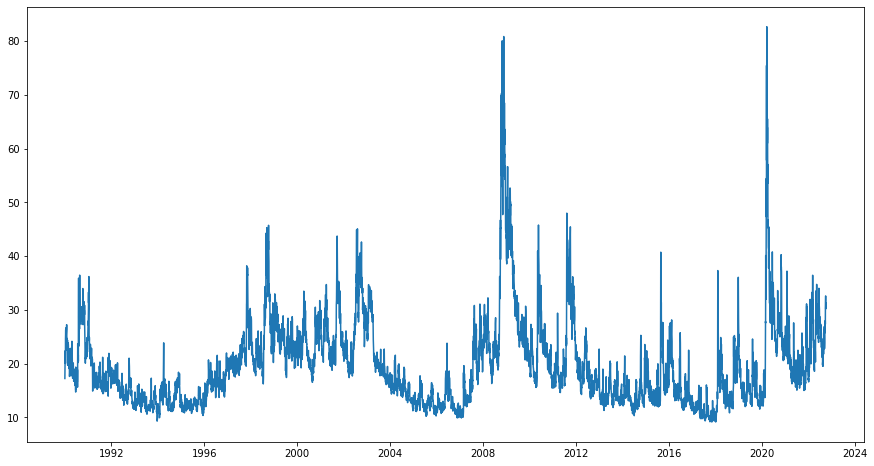

In [ ]:
vix = yf.download('^VIX')
plt.plot(vix['Adj Close'])

# Nonstationary Series into Stationary Series:
* take first differences with pandas diff()
* If growing at exponential rate -> may need to log. to remove exponential growth, then diff

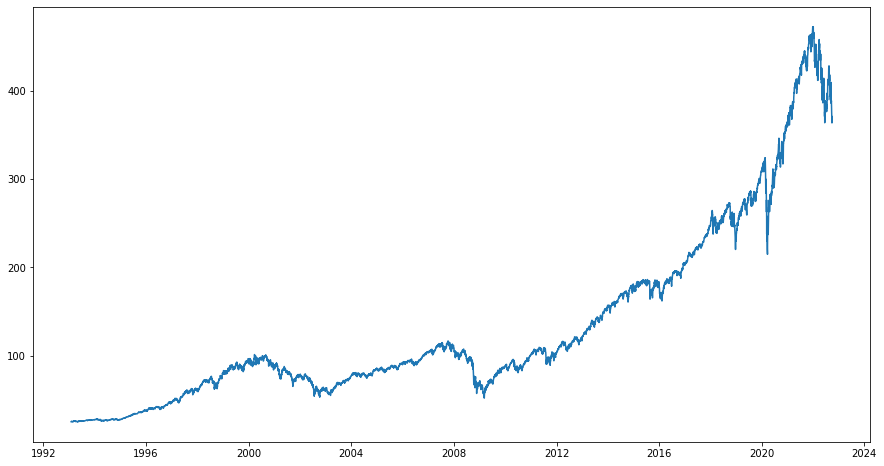

In [ ]:
plt.plot(spy['Adj Close'])

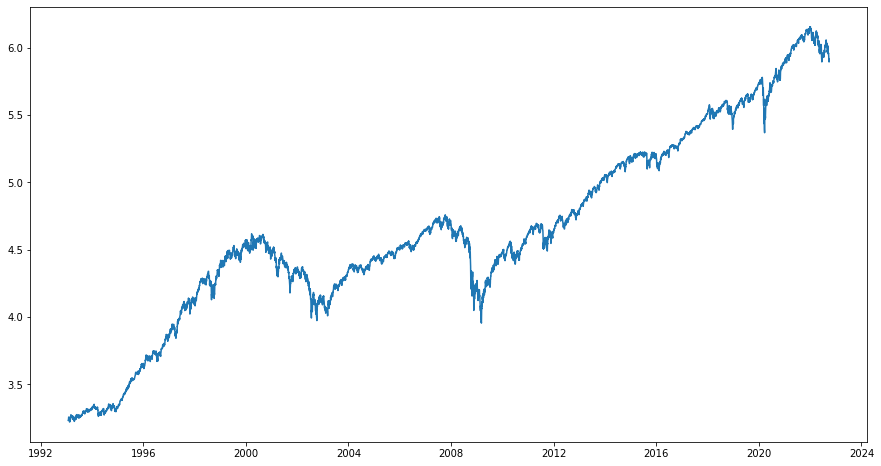

In [ ]:
plt.plot(np.log(spy['Adj Close']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


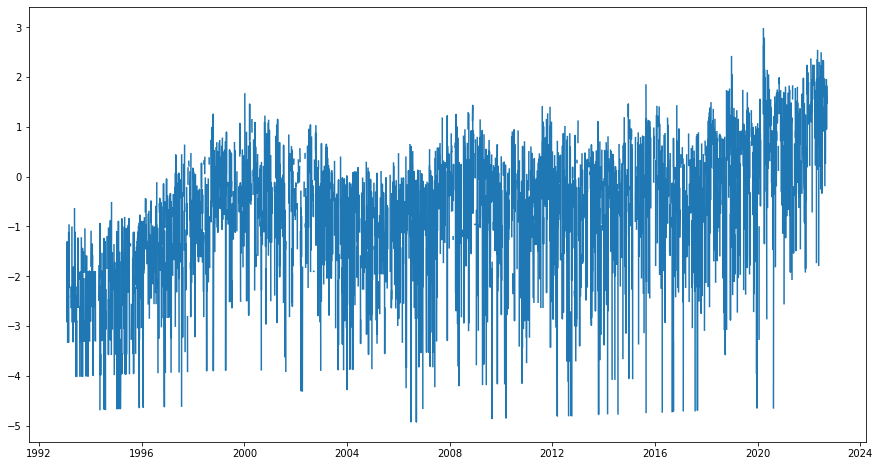

In [ ]:
plt.plot(np.log(spy['Adj Close'].diff()))

#**Autoregressive (AR) Models - Introduction**
* Todays value = mean plus a fraction phi of yesterday's value, plus noise.
* $Rt = u + \phi Rt-1 + ∉t$
* AR(1) model is when only one lagged value on right hand side (t-1)
* if AR parameter, phi $\phi$ = 1, then process is a random walk
* if AR parameter, phi $\phi$ = 0, then process is white noise
* For stationarity, -1 < $\phi$ < 1

## Interpretation:
* **Negative $\phi$: Mean reversion**
  * a positive return last period (t-1), implies this periods return more likely to be negative

* **Positive $\phi$: Momentum**
  * a positive return last period (t-1), implies this periods return more likely to be positive



In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

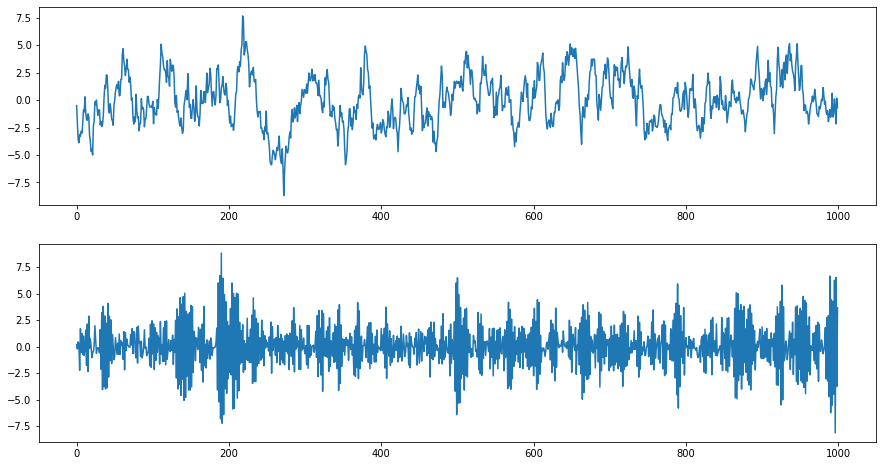

In [ ]:
plt.subplot(2,1,1)

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

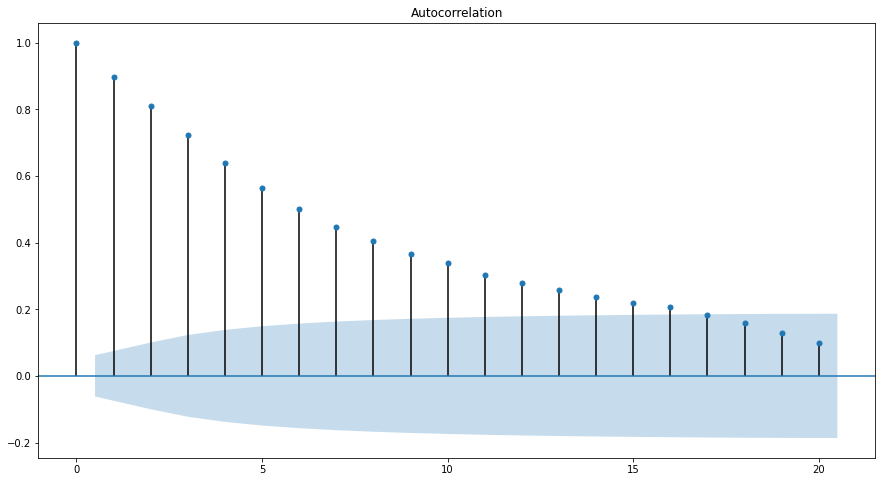

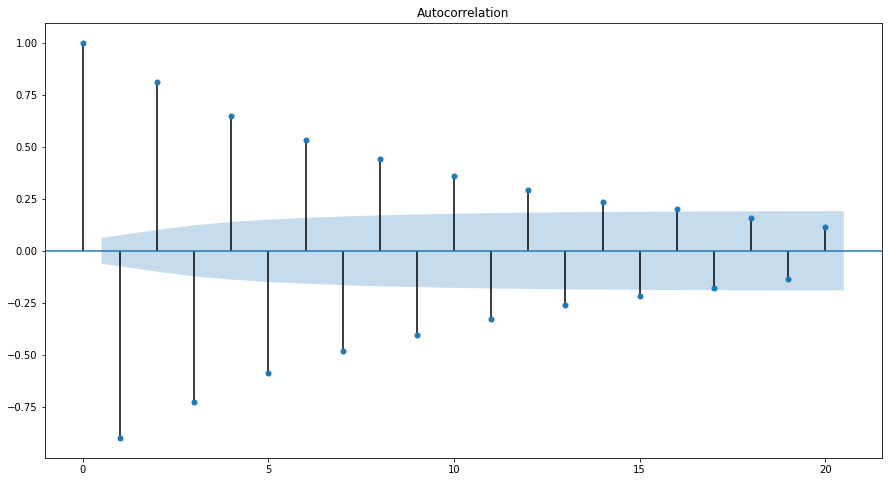

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=.05, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=.05, lags=20)
plt.show()


In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1414.075
Date:                Thu, 29 Sep 2022   AIC                           2834.150
Time:                        12:00:58   BIC                           2848.873
Sample:                             0   HQIC                          2839.746
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0150      0.308     -0.049      0.961      -0.618       0.588
ar.L1          0.8970      0.014     65.698      0.000       0.870       0.924
sigma2         0.9887      0.045     21.752      0.0

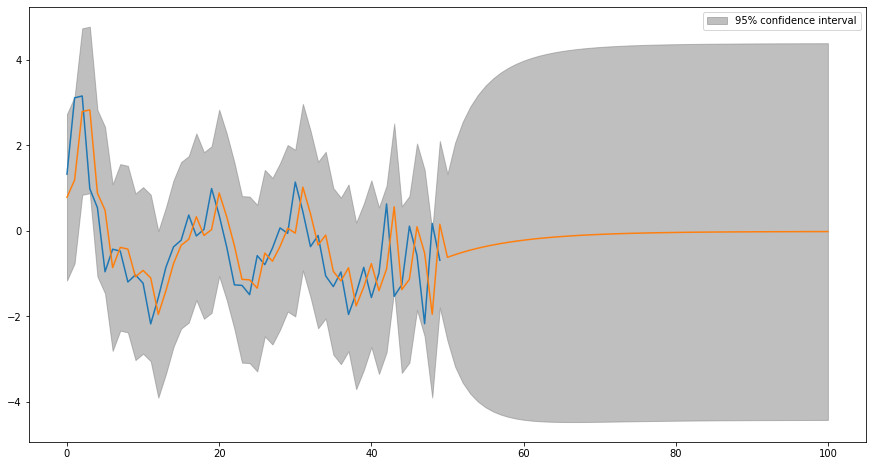

In [ ]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
plt.plot(simulated_data_1[950:])
plot_predict(res, start=950, end=1050, ax=ax)
plt.show()

# Forecast 10Y yields using AR(1) Model
* mod = ARIMA(data, order=(1,0,0))
* result = mod.fit()

**ARIMA, order=(p,d,q):**
* d, relates to whether you take first differences of the data to make time series stationary. 0 assumes no differences
* q, is MA. 
* Order(1,0,0) means fitting data to an AR(1)model
* Order(2,0,0) means fitting d[link text](https://)ata to an AR(2)model


[*********************100%***********************]  1 of 1 completed


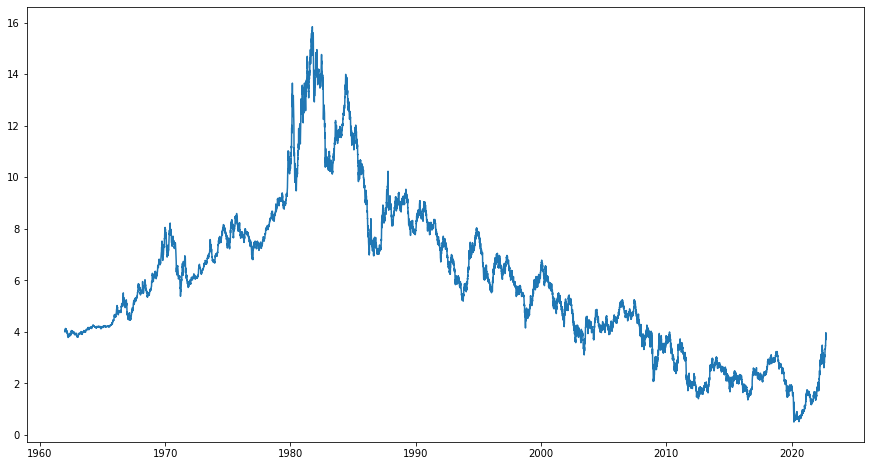

In [ ]:
yields = yf.download('^TNX')
plt.plot(yields['Adj Close'])

In [ ]:
# Import the ARIMA models from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
# forecast with AR(1) model
model = ARIMA(yields['Adj Close'], order = (1,0,0))
res = model.fit()
print(res.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const     5.900658
ar.L1     0.999770
sigma2    0.004216
dtype: float64


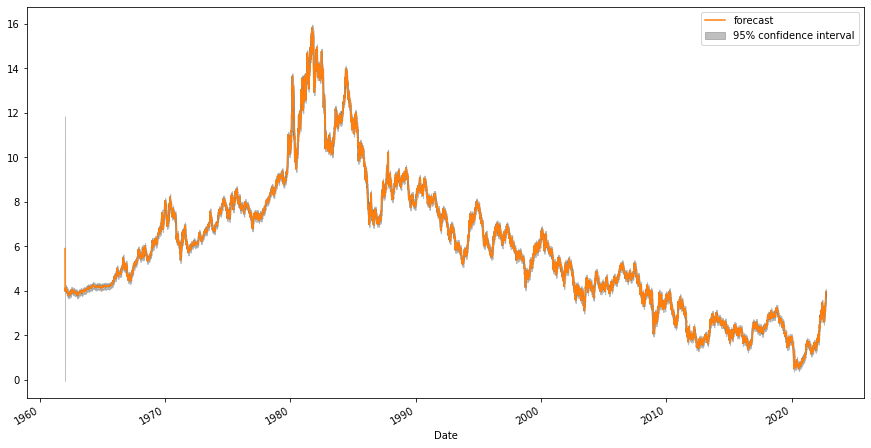

In [ ]:
# Plot the data and the forecast
fig, ax = plt.subplots()
plt.plot(yields['Adj Close'])
plot_predict(res, ax=ax, alpha = 0.05)
plt.show()

# Cointegration Models (BTC & ETH)
* 2 time series can look like a random walk but the spread might be stationary
2 steps:
* 1. Regress one time series on the other to get cointegration vector (regress BTC on ETH)
* 2. Perform ADF test on residuals to test stationary or not

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
btc_eth = yf.download(['btc-usd', 'eth-usd'])['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
# Regress BTC on ETH
eth = sm.add_constant(btc_eth['ETH-USD'])
result = sm.OLS(btc_eth['BTC-USD'],eth).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
b = result.params[1]
print('intercept is ', result.params[0], 'and the slope is ', b)

intercept is  5536.498841933237 and the slope is  13.09596816516872


In [ ]:
# ADF test
adf_stats = adfuller(btc_eth['BTC-USD'] - b*btc_eth['ETH-USD'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.02512265098625509


### The data suggests that Bitcoin and Ethereum are cointegrated.

# Analysing VIX Monthly Data
1. Test for random walk
2. Take the difference to transform into stationary series
3. Compute ACF and PACF
4. Fit AR, MA, ARMA models
5. Use Information Criterion to choose best model


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
vix_monthly = vix.resample('M').last()

In [ ]:
vix_chg = vix_monthly['Adj Close'].diff().dropna()

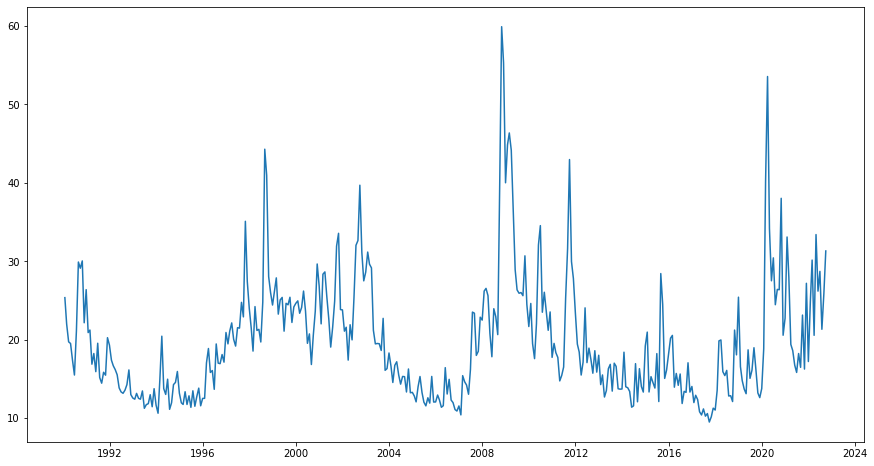

In [ ]:
plt.plot(vix_monthly['Adj Close'])

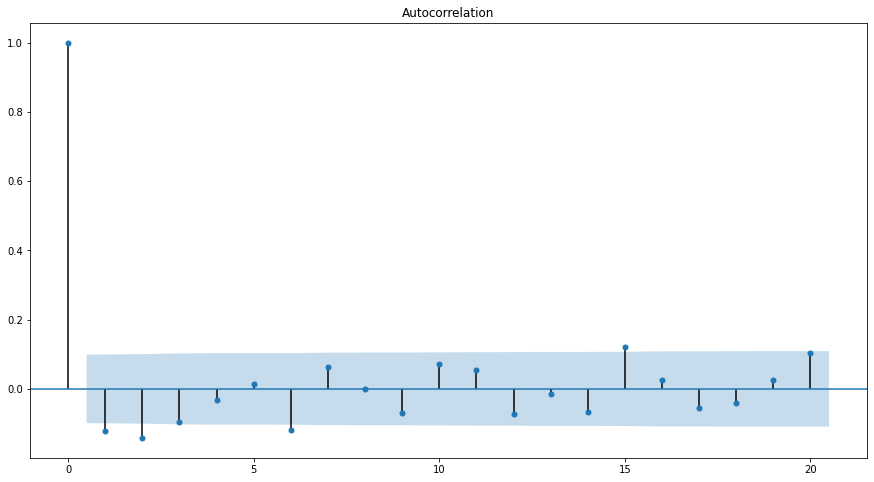

In [ ]:
# Plot the ACF
plot_acf(vix_chg, lags=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


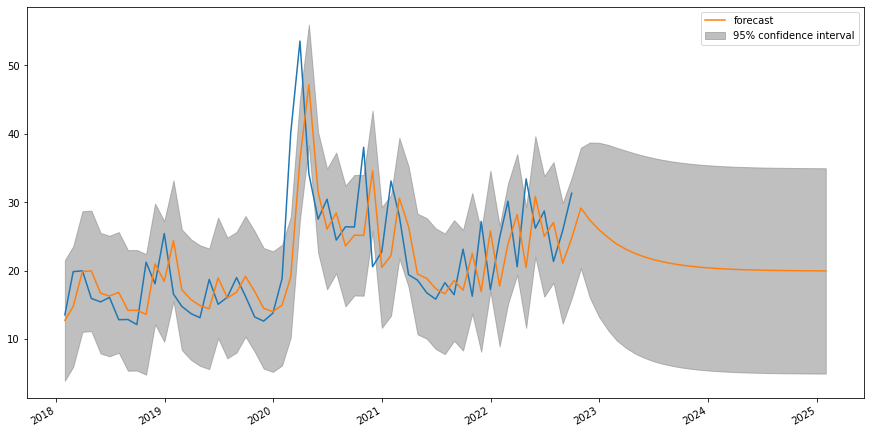

In [ ]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(vix_monthly['Adj Close'], order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
t0 = (vix_monthly['Adj Close'].last('5Y').index[0]).strftime('%Y-%m-%d')

fig, ax = plt.subplots()
plt.plot(vix_monthly['Adj Close'].last('5Y'))
plot_predict(res,start=t0, end='2025-1-1',ax=ax)
plt.show()